In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [31]:
df, meta = arff.loadarff('/Users/anilthapa/ML_Project/data/miami2016.arff')

In [8]:
df = DataFrame(df)

In [9]:
meta

Dataset: 'prep'
	LATITUDE's type is numeric
	LONGITUDE's type is numeric
	PARCELNO's type is numeric
	SALE_PRC's type is numeric
	LND_SQFOOT's type is numeric
	TOT_LVG_AREA's type is numeric
	SPEC_FEAT_VAL's type is numeric
	RAIL_DIST's type is numeric
	OCEAN_DIST's type is numeric
	WATER_DIST's type is numeric
	CNTR_DIST's type is numeric
	SUBCNTR_DI's type is numeric
	HWY_DIST's type is numeric
	age's type is numeric
	avno60plus's type is numeric
	month_sold's type is numeric
	structure_quality's type is numeric

In [10]:
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.222801e+11,440000.0,9375.0,1753.0,0.0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67.0,0.0,8.0,4.0
1,25.891324,-80.153968,6.222801e+11,349000.0,9375.0,1715.0,0.0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63.0,0.0,9.0,4.0
2,25.891334,-80.153740,6.222801e+11,800000.0,9375.0,2276.0,49206.0,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61.0,0.0,2.0,4.0
3,25.891765,-80.152657,6.222801e+11,988000.0,12450.0,2058.0,10033.0,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63.0,0.0,9.0,4.0
4,25.891825,-80.154639,6.222801e+11,755000.0,12800.0,1684.0,16681.0,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42.0,0.0,7.0,4.0


In [12]:
df.shape

(13932, 17)

In [13]:
df.isna().any()

LATITUDE             False
LONGITUDE            False
PARCELNO             False
SALE_PRC             False
LND_SQFOOT           False
TOT_LVG_AREA         False
SPEC_FEAT_VAL        False
RAIL_DIST            False
OCEAN_DIST           False
WATER_DIST           False
CNTR_DIST            False
SUBCNTR_DI           False
HWY_DIST             False
age                  False
avno60plus           False
month_sold           False
structure_quality    False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  float64
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  float64
 5   TOT_LVG_AREA       13932 non-null  float64
 6   SPEC_FEAT_VAL      13932 non-null  float64
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  float64
 14  avno60plus         13932 non-null  float64
 15  month_sold         13932 non-null  float64
 16  structure_quality  139

In [14]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [15]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [40]:
price = np.log10(df['SALE_PRC'])

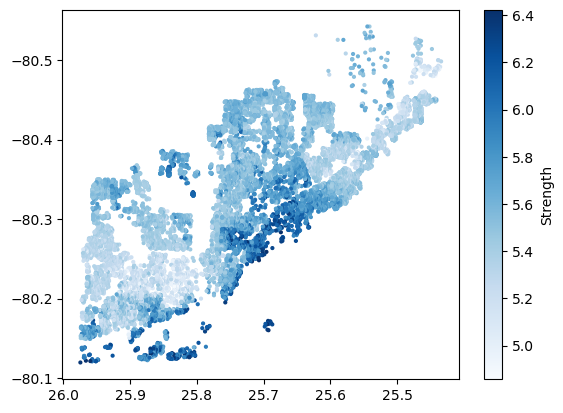

In [54]:
plt.scatter(df['LATITUDE'], df['LONGITUDE'], s= 4,c = price, cmap='Blues')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(label ='Strength')
plt.show()

In [59]:
cost = df['SALE_PRC']

In [60]:
cost_sorted = np.sort(cost)

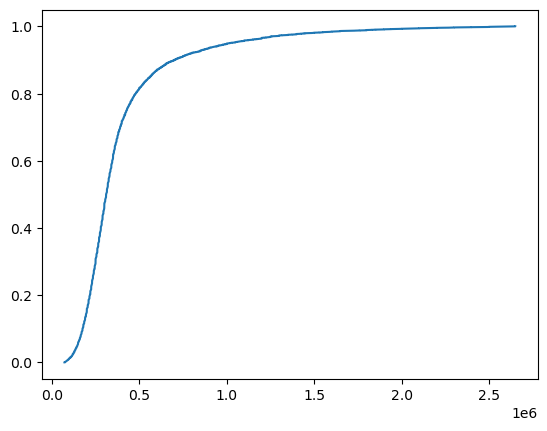

In [62]:
plt.plot(cost_sorted, np.linspace(0,1,len(cost_sorted)))
plt.show()

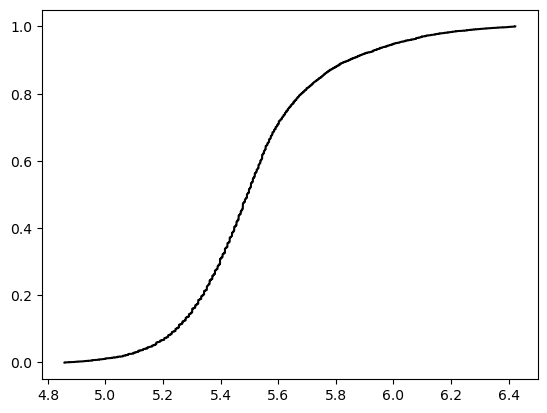

In [64]:
plt.plot(np.log10(cost_sorted), np.linspace(0,1, len(cost_sorted)), color='k')

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


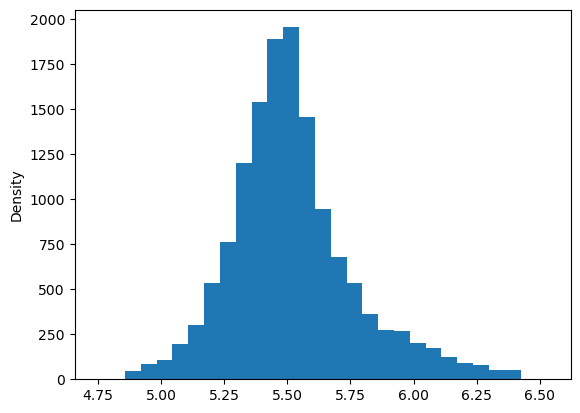

In [91]:
plt.hist(np.log10(cost), bins =25, alpha = 1)
sns.kdeplot(np.log10(cost), fill=True)
plt.show()